# **Assignment 3: Multi-layered Perceptrons**

**Name:** Sathyasri S.

**Registration No.:** BL.EN.U4ECE18138

**Class:** ECE - C

---





# **Helper Functions:**

- Sigmoid Function
- Derivative of Sigmoid Function
- Gradient Descent (`update_weights`)

In [1]:
import numpy as np
import math
import random
from tabulate import tabulate

def sigmoid(x):
  return 1 / (1 + math.exp(-1 * x))

def der_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

def MLP(wb, x1, x2):
  W = np.empty([3, 2])
  b = np.zeros(3)

  k = 0
  for i in range(0, 3):
    for j in range(0, 2):
      W[i][j] = wb[k]
      k += 1
  
  k = 0
  for i in range(6, 9):
    b[k] = wb[i]
    k += 1

  X = np.array([x1, x2])
  H = np.matmul(W[:2, :2], X) + b[:2]
  Z1 = sigmoid(H[0])
  Z2 = sigmoid(H[1])

  pre_activation = ((W[2][0] * Z1) + (W[2][1] * Z2) + b[2])

  y1 = sigmoid(pre_activation)

  return y1, Z1, Z2, W, b, pre_activation

def update_weights(LR, wb, x1, x2, y):
  y1, Z1, Z2, W, b, pre_activation = MLP(wb, x1, x2)

  dy1_dZ1 = der_sigmoid(pre_activation) * W[2][0]
  dy1_dZ2 = der_sigmoid(pre_activation) * W[2][1]

  W[2][0] -= LR * ((y1 - y) * der_sigmoid(pre_activation) * Z1)
  W[2][1] -= LR * ((y1 - y) * der_sigmoid(pre_activation) * Z2)
  b[2] -= LR * ((y1 - y) * der_sigmoid(pre_activation))

  # Update W11, W21 and b1
  pre_act = W[0][0] * x1 + W[1][0] * x2 + b[0];
  dZ1_dW11 = der_sigmoid(pre_act) * x1;
  dZ1_dW21 = der_sigmoid(pre_act) * x2;
  dZ1_db1 = der_sigmoid(pre_act);
  W[0][0] -= (y1 - y) * (LR * (dy1_dZ1 * dZ1_dW11));
  W[1][0] -= (y1 - y) * (LR * (dy1_dZ1 * dZ1_dW21));
  b[0] -= (y1 - y) * (LR * (dy1_dZ1 * dZ1_db1));

  # Update W12, W22 and b2
  pre_act = W[0][1] * x1 + W[1][1] * x2 + b[1];
  dZ2_dW12 = der_sigmoid(pre_act) * x1;
  dZ2_dW22 = der_sigmoid(pre_act) * x2;
  dZ2_db2 = der_sigmoid(pre_act);
  W[0][1] -= (y1 - y) * (LR * (dy1_dZ2 * dZ2_dW12));
  W[1][1] -= (y1 - y) * (LR * (dy1_dZ2 * dZ2_dW22));
  b[1] -= (y1 - y) * (LR * (dy1_dZ2 * dZ2_db2)); 

  wb = W.flatten()
  wb = np.concatenate((wb, b))

  return wb

# **Question 1:**
### Implementing an **XOR Logic Gate** using MLP.

In [29]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]

wb = [random.randrange(-1, 2) for i in range(9)]
LR = 0.7
nitn = 3000

with open("weight.txt", "w") as fr:
  str1 = "Weights (9) ....................... RMSE"
  fr.write(str1)

  for it in range(0, nitn):
    print("=====================================================")
    print("Weights in iteration ", it, ":\n\n", wb)
    train_RMSE = 0.0
    for k in range(0, 4):
      wb = update_weights(LR, wb, X[k][0], X[k][1], Y[k])
      y = Y[k]
      y1, Zx, Zx2, Wx, bx, pre_activationx = MLP(wb, X[k][0], X[k][1])
      print(y1)
      train_RMSE += (y1 - y) ** 2
    train_RMSE = train_RMSE ** 0.5

    for j in range(0, len(wb)):
      str1 = wb[j]
      fr.write(str(str1))
    str1 = "RMSE: " + str(train_RMSE)
    fr.write(str1)

print("---------------------------------------------------------\n")
print("Testing the MLP after training:\n")

data = []
for i in range(0, 4):
  x1 = X[i][0]
  x2 = X[i][1]
  y1, Z1, Z2, W, b, pre_activation = MLP(wb, x1, x2)
  l = [x1, x2, Y[i], y1]
  data.append(l)

print(tabulate(data, headers = ["x1", "x2", "Expected", "Predicted"]))

Streaming output truncated to the last 5000 lines.
0.0501073511168829
0.9576493729918637
0.9536299797797453
0.047156932582858725
Weights in iteration  2446 :

 [-6.1558459   4.81868975  5.58899078 -5.21174876  8.08475847  7.15122448
 -3.07026256 -2.65151697 -3.77034643]
0.05008011165718497
0.9576727984693799
0.9536561565567718
0.0471300332503663
Weights in iteration  2447 :

 [-6.15614571  4.81917859  5.5893636  -5.21220771  8.08569463  7.15234506
 -3.07046239 -2.65176191 -3.77085976]
0.05005291427587889
0.9576961870551314
0.9536822921269165
0.047103176899751985
Weights in iteration  2448 :

 [-6.15644518  4.81966687  5.589736   -5.21266613  8.08662983  7.15346448
 -3.07066199 -2.65200658 -3.77137256]
0.05002575886739014
0.9577195388434155
0.9537083865949009
0.04707636342018691
Weights in iteration  2449 :

 [-6.15674432  4.82015461  5.59010798 -5.21312402  8.08756408  7.15458273
 -3.07086135 -2.65225099 -3.77188482]
0.04999864532650867
0.9577428539281991
0.9537344400650808
0.047049592

# **Question 2:**
### Implementing an **AND Logic Gate** using MLP.

In [21]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 0, 0, 1]

wb = [random.randrange(-1, 2) for i in range(9)]
LR = 0.7
nitn = 3000

with open("weight.txt", "w") as fr:
  str1 = "Weights (9) ....................... RMSE"
  fr.write(str1)

  for it in range(0, nitn):
    print("=====================================================")
    print("Weights in iteration ", it, ":\n\n", wb)
    train_RMSE = 0.0
    for k in range(0, 4):
      wb = update_weights(LR, wb, X[k][0], X[k][1], Y[k])
      y = Y[k]
      y1, Zx, Zx2, Wx, bx, pre_activationx = MLP(wb, X[k][0], X[k][1])
      print(y1)
      train_RMSE += (y1 - y) ** 2
    train_RMSE = train_RMSE ** 0.5

    for j in range(0, len(wb)):
      str1 = wb[j]
      fr.write(str(str1))
    str1 = "RMSE: " + str(train_RMSE)
    fr.write(str1)

print("---------------------------------------------------------\n")
print("Testing the MLP after training:\n")

data = []
for i in range(0, 4):
  x1 = X[i][0]
  x2 = X[i][1]
  y1, Z1, Z2, W, b, pre_activation = MLP(wb, x1, x2)
  l = [x1, x2, Y[i], y1]
  data.append(l)

print(tabulate(data, headers = ["x1", "x2", "Expected", "Predicted"]))

Streaming output truncated to the last 5000 lines.
2.993844746064985e-06
0.1495595880801252
0.35653182901499164
0.5595733550034108
Weights in iteration  2446 :

 [-10.44712812  -8.70998201  -1.26386836  -9.38637295 -12.65454266
  -4.78939006   6.87500877  13.30087703   4.71301993]
2.997159703981639e-06
0.1477143531335835
0.3556982360607195
0.5614887685775306
Weights in iteration  2447 :

 [-10.43394316  -8.71022695  -1.27188432  -9.38846074 -12.65818686
  -4.78945827   6.88881839  13.30188102   4.71816551]
3.0009322509655136e-06
0.14581900271571702
0.354795521107044
0.5634635829115383
Weights in iteration  2448 :

 [-10.42038461  -8.71046183  -1.28004833  -9.39055585 -12.66184896
  -4.78944905   6.90298318  13.30286614   4.72341424]
3.0051918832409296e-06
0.14387203765023399
0.35381787714198587
0.5655008500460905
Weights in iteration  2449 :

 [-10.40643749  -8.71068672  -1.28836587  -9.39265807 -12.6655297
  -4.78935696   6.91751793  13.30383178   4.72877139]
3.0099707189635235e-06
0.

# **Question 3:**
### **Polynomial Regression** using MLP for a given function.

Inputs (X):
 [[0.0289789  0.09434553 0.30715717]
 [0.01261426 0.05418858 0.2327844 ]
 [0.56998985 0.68745575 0.82912951]]

X-transpose:
 [[0.0289789  0.01261426 0.56998985]
 [0.09434553 0.05418858 0.68745575]
 [0.30715717 0.2327844  0.82912951]]

Expected Output (Y):
 [5.92632982 5.64074879 9.29061614]

Initialized weights(W):
 [[0.7406419  0.59259575 0.79534063]
 [0.10228778 0.2025341  0.08857312]
 [0.93436167 0.88904132 0.7537478 ]]

Initialized bias(b):
 [0.42522618 0.62116932 0.55137011]
---------------------------------------------------------------------

Iteration  1 :


RMSE values:
 [12.55275587 11.71362884 21.55367061]

Expected Y
:  [5.92632982 5.64074879 9.29061614]

Predicted Y
:  [0.91578975 0.80057754 2.72499803]

Iteration  2 :


RMSE values:
 [11.75310054 11.03996287 19.11259927]

Expected Y
:  [5.92632982 5.64074879 9.29061614]

Predicted Y
:  [1.07801041 0.94182064 3.10796311]

Iteration  3 :


RMSE values:
 [11.00964779 10.40929904 16.9390048 ]

Expected Y
:  [5.926

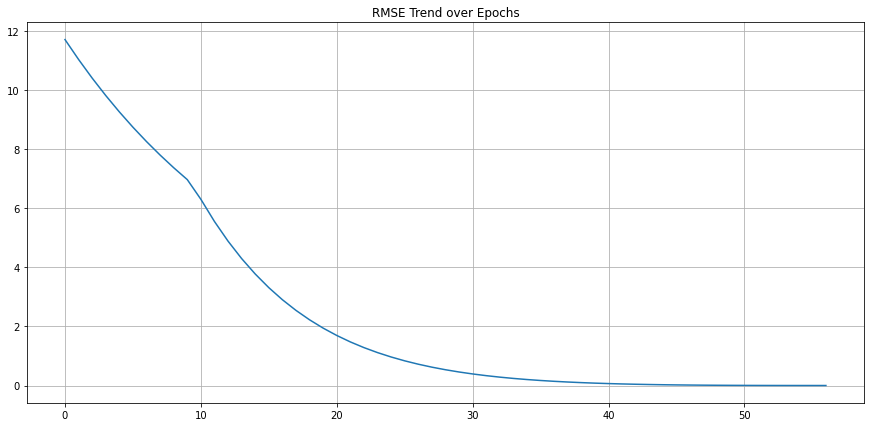

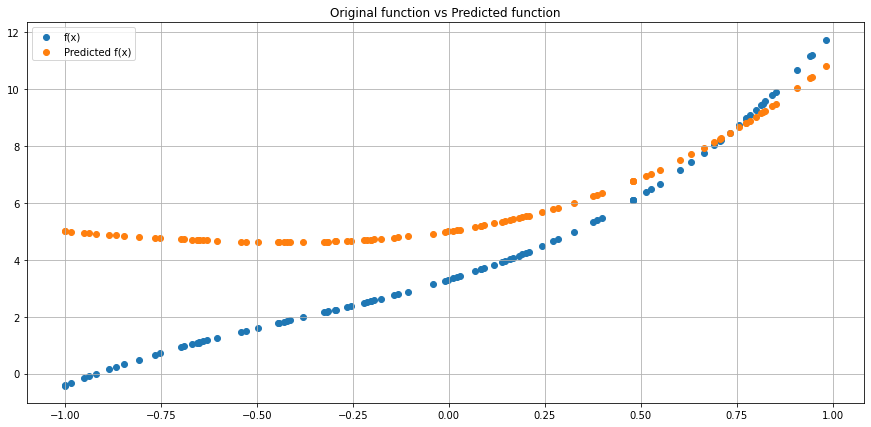

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def f(x):
  return ((x ** 3) + (3 * (x ** 2)) + (2 * x) + 5)

def gradient_descent(rmse_arr, lr, X, Y, Y_hat, W, b):
  W -= lr * (-1 * np.dot((Y - Y_hat), X))
  b -= lr * (-1 * (Y - Y_hat))

  return W, b

def plot_functions(W, b):
  x = np.random.uniform(-1, 1, 100)
  Y_hat = (W[0][0] * (x ** 3)) + (W[0][1] * (x ** 2)) + (W[0][2] * x) + b[0]
  plt.figure(figsize = [15, 7])
  labels = ["f(x)", "Predicted f(x)"]
  data = []
  for i in range(len(x)):
    l = [x[i], f(x)[i], Y_hat[i]]
    data.append(l)

  print("Generated Dataset (100 values between [-1, 1]\n")
  print(tabulate(data, headers = ['X', 'Y (Expected)', 'Y_hat (Predicted)']))
  plt.scatter(x, Y_hat)
  plt.scatter(x, f(x)) 
  plt.legend(labels)
  plt.title("Original function vs Predicted function")
  plt.grid()

X_array = np.random.rand(3)
Y = np.array([f(i) for i in X_array])
X = np.array([[(i ** 3), (i ** 2), i] for i in X_array])

W = np.random.rand(3, 3)
b = np.random.rand(3)

Y_hat = np.diag(np.matmul(W, X.T)) + b
RMSE_arr = 0.5 * ((Y - Y_hat) ** 2)

print("Inputs (X):\n", X)
print("\nX-transpose:\n", X.T)
print("\nExpected Output (Y):\n", Y)
print("\nInitialized weights(W):\n", W)
print("\nInitialized bias(b):\n", b)
print("---------------------------------------------------------------------\n")

rm_min = np.amin(RMSE_arr) 
RMSE = [100, rm_min]
lr = 0.02
i = 0
while (RMSE[-1] < RMSE[-2]):
  W, b = gradient_descent(RMSE_arr, lr, X, Y, Y_hat, W, b)
  Y_hat = np.diag(np.matmul(W, X.T)) + b
  RMSE_arr = 0.5 * ((Y - Y_hat) ** 2)
  rm_min = np.amin(RMSE_arr) 
  RMSE.append(rm_min)
  i += 1

  print("Iteration ", i, ":\n\n")
  print("RMSE values:\n", RMSE_arr)
  print("\nExpected Y\n: ", Y)
  print("\nPredicted Y\n: ", Y_hat)
  print("===================================================================\n")

print("\nFinal weights (W):\n", W)
print("\nFinal bias (b):\n\n", b)

plt.figure(figsize = [15, 7])
plt.plot([z for z in range(0, i)], RMSE[2:])
plt.title("RMSE Trend over Epochs")
plt.grid()
print("\n\n")
plot_functions(W, b)

# **Question 4:**
### **Numerical Differentiation** for given functions.

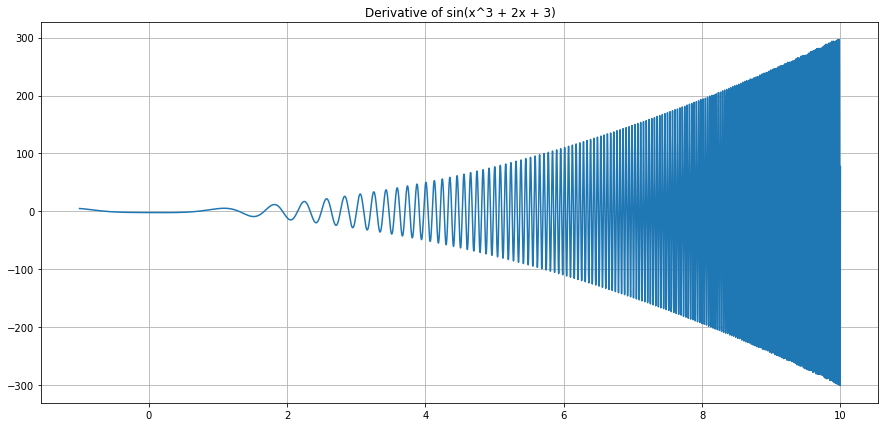

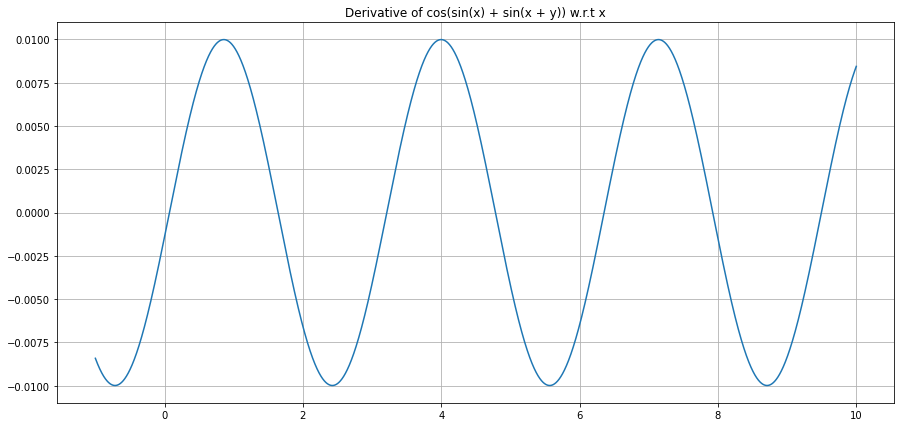

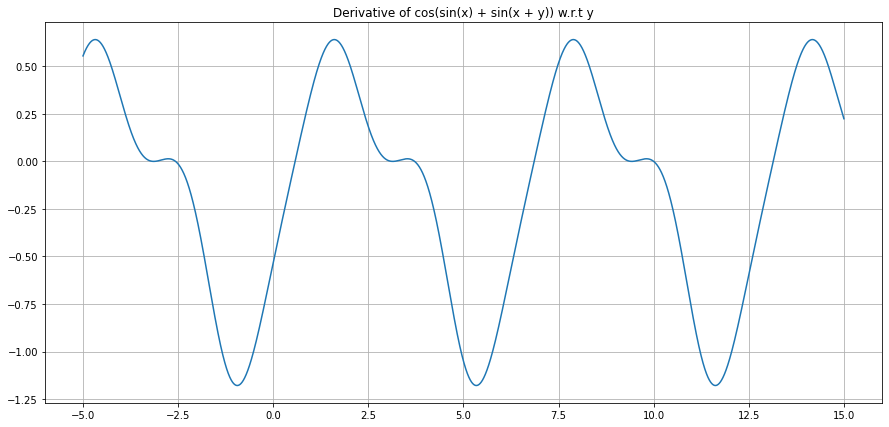

In [8]:
import math
import numpy as np

# ----------------------------- Question 4(a) -----------------------------

def fa(x):
  return math.sin((x ** 3) + (2 * x) + 3)

# Numerical derivative of the first given function
def der_fa(x, h):
  y_h = math.sin(((x + h) ** 3) + (2 * (x + h)) + 3)
  return ((y_h - fa(x)) / h)

# Main Driver Program (Question 4(a))
h = 0.001
x = np.arange(-1, 10, 0.001)
y = [der_fa(i, h) for i in x]

plt.figure(figsize = [15, 7])
plt.plot(x, y)
plt.title("Derivative of sin(x^3 + 2x + 3)")
plt.grid()

# ----------------------------- Question 4(b) -----------------------------

def fb(x, y):
  return math.cos(math.sin(x) + math.sin(x + y))

# Derivative of function w.r.t. x
def der_fb_x(x, y, h):
  z_h = math.cos(math.sin((x + h)) + math.sin((x + h) + y))
  return ((z_h - fb(x, y)) / h)

# Derivative of function w.r.t. y
def der_fb_y(x, y, h):
  z_h = math.cos(math.sin(x) + math.sin(x + (y + h)))
  return ((z_h - fb(x, y)) / h)

# Main Driver Program (Question 4(b)-(i))
h = 0.001
x = np.arange(-1, 10, 0.001)
y = 3
z_x = [der_fb_x(i, y, h) for i in x]

plt.figure(figsize = [15, 7])
plt.plot(x, z_x)
plt.title("Derivative of cos(sin(x) + sin(x + y)) w.r.t x")
plt.grid()

# Main Driver Program (Question 4(b)-(ii))
h = 0.001
y = np.arange(-5, 15, 0.001)
x = -5
z_y = [der_fb_x(x, i, h) for i in y]

plt.figure(figsize = [15, 7])
plt.plot(y, z_y)
plt.title("Derivative of cos(sin(x) + sin(x + y)) w.r.t y")
plt.grid()